In [3]:
import time

import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib_inline.backend_inline
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data
from matplotlib.colors import to_rgba
from torch import Tensor
from tqdm.notebook import tqdm

matplotlib_inline.backend_inline.set_matplotlib_formats("svg", "pdf")

In [4]:
print("Using torch", torch.__version__)

Using torch 2.1.2+cu121


In [5]:
torch.manual_seed(42) #시드값 고정

# Tensor use

In [6]:
x = Tensor(2, 3, 4)
print(x)

tensor([[[-1.4961e-36,  4.5588e-41, -1.4943e-36,  4.5588e-41],
         [-1.4943e-36,  4.5588e-41, -1.4961e-36,  4.5588e-41],
         [-1.4943e-36,  4.5588e-41, -1.4943e-36,  4.5588e-41]],

        [[-1.4961e-36,  4.5588e-41, -1.4960e-36,  4.5588e-41],
         [-1.4962e-36,  4.5588e-41, -1.4960e-36,  4.5588e-41],
         [-1.4960e-36,  4.5588e-41, -1.4960e-36,  4.5588e-41]]])


In [7]:
x = Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [8]:
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


In [9]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


## Tensor to numpy, numpy to Tensor

In [10]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


In [11]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


## operation

In [12]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


In [13]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (before) tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
X1 (after) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (after) tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])


In [14]:
x = torch.arange(6)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])


In [15]:
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [16]:
x = x.permute(1, 0)
print("X", x)

X tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [17]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [18]:
W = torch.arange(9).view(3, 3)
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [19]:
h = torch.matmul(x, W)
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


## indexing

In [20]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [21]:
print(x[:, 1])

tensor([1, 5, 9])


In [22]:
print(x[0])  

tensor([0, 1, 2, 3])


In [23]:
print(x[:2, -1])

tensor([3, 7])


In [24]:
print(x[1:3, :])

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


# Gradiant

### 필요한 이유: 
- 매개변수 업데이트하기 위해
  * 역전파 -> 손실 함수의 기울기를 이용하여 각 매개변숭에 대한 기울기 계산
  * 경사하강법 -> 최적화 알고리증 중 하나, 손실 함수의 기울기를 이용하여 매개변수 업데이트
  * 자동 미분 -> (autograd) 계산 그래프 생성하고 역전파 알고지름을 실행 후 매개변수에 대한 기울기 계산 
  * 그래디언트 기반 최적화 및 학습 -> 학습률 조정, 가중치 감쇠 등..

In [25]:
x = torch.ones((3,))
print(x.requires_grad)

False


In [26]:
x.requires_grad_(True)
print(x.requires_grad)

True


In [27]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True)  # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


In [28]:
a = x + 2
b = a**2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


In [29]:
y.backward()

In [30]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


# GPU 지원

In [31]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


In [32]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


In [33]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [34]:
x = torch.randn(5000, 5000)

# CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

# GPU version
if torch.cuda.is_available():
    x = x.to(device)
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    start.record()
    _ = torch.matmul(x, x)
    end.record()
    torch.cuda.synchronize() 
    print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")
    # 왜 gpu가 더 느리지?

CPU time: 0.22116s
GPU time: 1.89578s


In [35]:
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# 연속형 XOR 예제

In [36]:
import torch.nn as nn
import torch.nn.functional as F

In [37]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        pass

## 단순 분류기

In [38]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

In [39]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [40]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


## 데이터 세트 클래스

In [41]:
import torch.utils.data as data

In [42]:
class XORDataset(data.Dataset):
    def __init__(self, size, std=0.1):
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        return self.size
        
    def __getitem__(self, idx):
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [43]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([0.9632, 0.1117]), tensor(1))


In [44]:
def visualize_samples(data, label):
    if isinstance(data, Tensor):
        data = data.cpu().numpy()
    if isinstance(label, Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

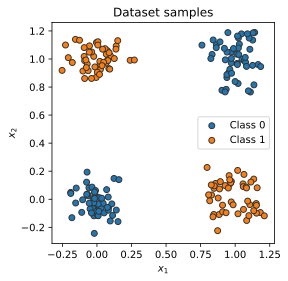

In [45]:
visualize_samples(dataset.data, dataset.label)
plt.show()

## 데이터 로더 클래스

In [46]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [47]:
data_inputs, data_labels = next(iter(data_loader))


print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[-0.0890,  0.8608],
        [ 1.0905, -0.0128],
        [ 0.7967,  0.2268],
        [-0.0688,  0.0371],
        [ 0.8732, -0.2240],
        [-0.0559, -0.0282],
        [ 0.9277,  0.0978],
        [ 1.0150,  0.9689]])
Data labels torch.Size([8]) 
 tensor([1, 1, 1, 0, 1, 0, 1, 0])


## 최적화

1. 데이터 로더에서 배치 가져오기
2. 배치에 대한 모델에서 예측 얻기
3. 예측과 라벨의 파이를 기반으로 손실을 계산
4. 역전파: 손실과 관련하여 모든 매개변수에 대한 기울기 계산
5. 그라데이션 방향으로 모델의 매개변수를 업데이트업데이트합니다.

## 손실 모듈

In [48]:
import torch.nn as nn

loss_module = nn.BCEWithLogitsLoss()

## 확률적 경사하강법

In [49]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

## train

In [50]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # 모델을 학습 모드로 설정
    model.train()

    # 학습 루프
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:
            # 단계 1: 입력 데이터를 디바이스로 이동 (GPU를 사용하는 경우에만 엄격하게 필요)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # 단계 2: 입력 데이터에 모델을 실행
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)  # 출력은 [배치 크기, 1]이지만 [배치 크기]로 변경

            # 단계 3: 손실을 계산
            loss = loss_module(preds, data_labels.float())

            # 단계 4: 역전파를 수행
            # 기울기를 계산하기 전에 모두 0으로 설정
            # 기울기는 덮어쓰기 대신 기존 것에 추가되지 않도록 수행
            optimizer.zero_grad()
            # 역전파 수행
            loss.backward()

            # 단계 5: 매개변수를 업데이트
            optimizer.step()


## 모델 저장

In [51]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-0.3851, -0.1043],
        [-0.0225, -0.5951],
        [-0.5302, -0.0411],
        [-0.1559, -0.1731]])), ('linear1.bias', tensor([-0.1501, -0.6921,  0.3138, -0.0009])), ('linear2.weight', tensor([[-0.3575,  0.0298,  0.4821, -0.4590]])), ('linear2.bias', tensor([-0.2364]))])


In [52]:
torch.save(state_dict, "our_model.tar")

In [53]:
# 디스크에서 상태 사전을 로드 (위와 동일한 이름)
state_dict = torch.load("our_model.tar")

# 새로운 모델을 생성하고 상태를 로드
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# 매개변수가 동일한지 확인
print("원본 모델\n", model.state_dict())
print("\n로드된 모델\n", new_model.state_dict())


원본 모델
 OrderedDict([('linear1.weight', tensor([[-0.3851, -0.1043],
        [-0.0225, -0.5951],
        [-0.5302, -0.0411],
        [-0.1559, -0.1731]])), ('linear1.bias', tensor([-0.1501, -0.6921,  0.3138, -0.0009])), ('linear2.weight', tensor([[-0.3575,  0.0298,  0.4821, -0.4590]])), ('linear2.bias', tensor([-0.2364]))])

로드된 모델
 OrderedDict([('linear1.weight', tensor([[-0.3851, -0.1043],
        [-0.0225, -0.5951],
        [-0.5302, -0.0411],
        [-0.1559, -0.1731]])), ('linear1.bias', tensor([-0.1501, -0.6921,  0.3138, -0.0009])), ('linear2.weight', tensor([[-0.3575,  0.0298,  0.4821, -0.4590]])), ('linear2.bias', tensor([-0.2364]))])


## 평가

In [54]:
test_dataset = XORDataset(size=500)
# drop_last -> 마지막 배치가 128보다 작더라도 삭제하지 않음
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False, pin_memory=True)

In [55]:
def eval_model(model, data_loader):
    model.eval()  # 모델을 평가 모드로 설정
    true_preds, num_preds = 0.0, 0.0

    with torch.no_grad():  # 다음 코드에서 그라디언트 비활성화
        for data_inputs, data_labels in data_loader:
            # 데이터를 모델의 장치로 이동
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)

            # 모델을 CPU 또는 GPU로 이동
            model.to(device)

            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)  # 예측 값을 0과 1 사이로 매핑하기 위해 시그모이드 사용
            pred_labels = (preds >= 0.5).long()  # 예측을 0과 1로 이진화

            # 정확도 메트릭을 위한 예측 기록 (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum().item()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"모델의 정확도: {100.0*acc:4.2f}%")

# eval_model 함수 호출
eval_model(model, test_data_loader)


모델의 정확도: 76.40%


## 분류 경계 시각화

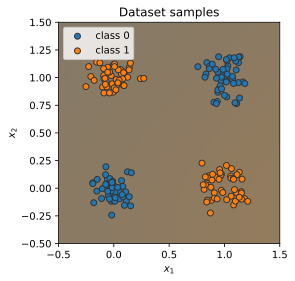

In [58]:
@torch.no_grad()  # 데코레이터, 함수 전체에 "with torch.no_grad(): ..."과 동일한 효과를 준다
def visualize_classification(model, data, label):
    if isinstance(data, Tensor):
        data = data.cpu().numpy()
    if isinstance(label, Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # 학습한 연산들을 활용
    model.to(device)
    c0 = Tensor(to_rgba("C0")).to(device)
    c1 = Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2)  # numpy의 meshgrid 함수와 동일한 역할
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    # 차원에 "None"을 지정하면 새로운 차원을 생성
    output_image = (1 - preds) * c0[None, None] + preds * c1[None, None]
    output_image = (
        output_image.cpu().numpy()
    )  # numpy 배열로 변환. 이는 CPU 상의 텐서에만 작동하므로 먼저 CPU로 이동
    plt.imshow(output_image, origin="lower", extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)


visualize_classification(model, dataset.data, dataset.label)
plt.show()
